<h1 align="center"> Operações unitárias 3

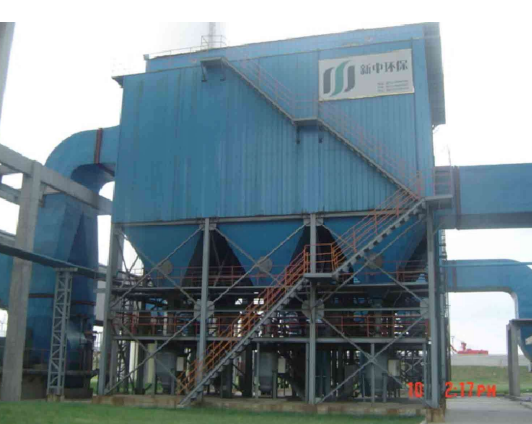

---

<h1 align="center"> Introdução

<h1> # Sistemas multifásicos

Os sistemas que teremos interesses em separar podem ser classificados mediante aos tipos de fases presentes nele.

Desse modo, podemos realizar separações entre as diferentes fases:

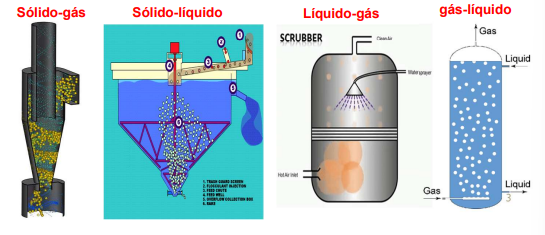

<h1> # Equipamentos que utilizam a força gravitacional

A seguir temos alguns equipamentos que utilizam a força gravitacional para realizar a separação:

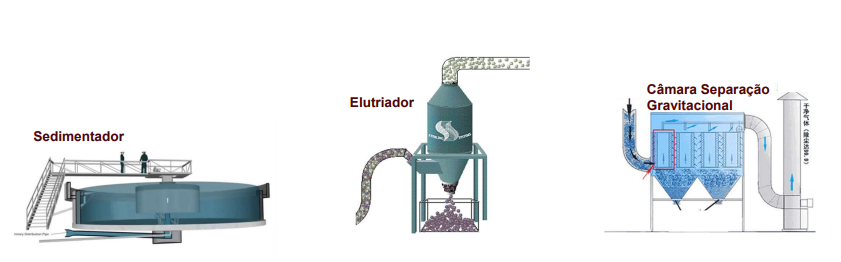

---

<h1 align="center"> Particulas

<h1> # [ 1 ] Reynolds para particulas

O **reynolds para particulas** é calculado da seguinte forma:

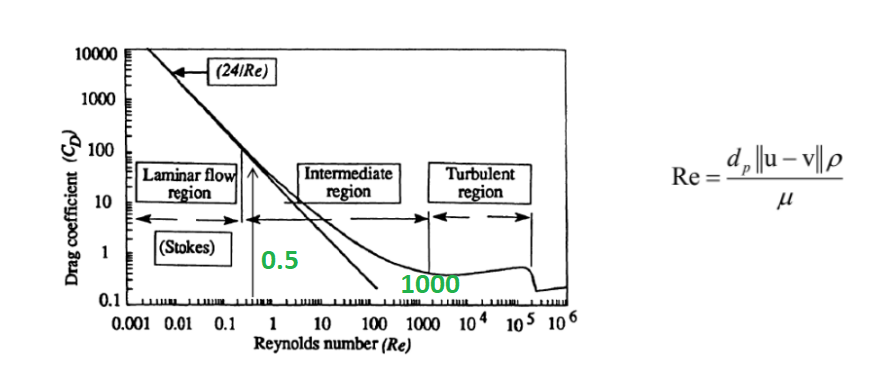

O **coeficiente de arraste** é calculado da seguinte forma:

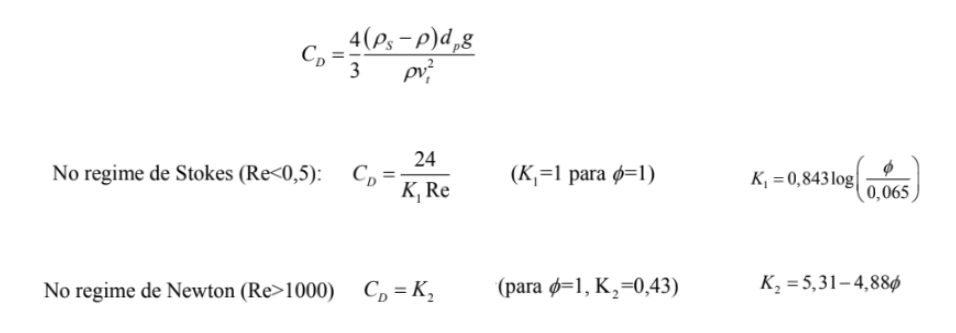


<h1> # [ 2 ] Reynolds para particulas: Correlações

Também podemos calcular o reynolds segundo as correlações:

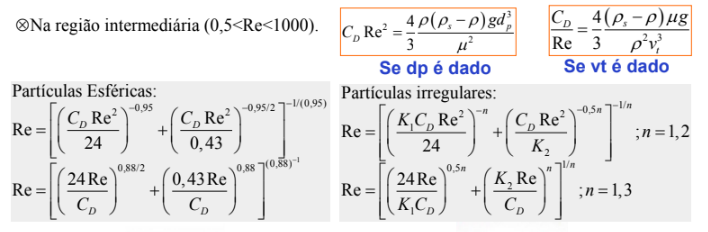

---

<h1 align="center"> Câmara de separação gravitacional

<h1> # [ 1 ] Câmara de Separação Gravitacional: Funcionamento

A câmara de separação gravitacional é dividida mediante as fases sendo separadas:

- **Sólido-gás**: Câmara de poeira (dp>43 um)
- **Sólido-líquido**: Tanque de areia

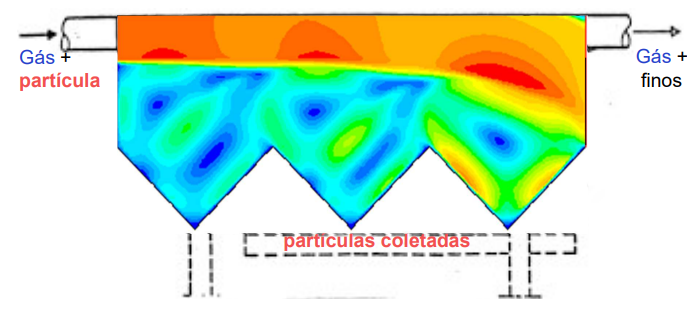

<h1> # [ 2 ] Câmara de Separação Gravitacional: Equacionamento

Considere a figura a seguir e suponha 1 particula escoando nela:

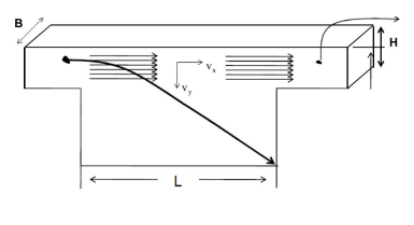

Essa partícula está sobe ação da **força gravitacional**, **empuxo** e **atrito**. Aplicando o balanço de forças temos:

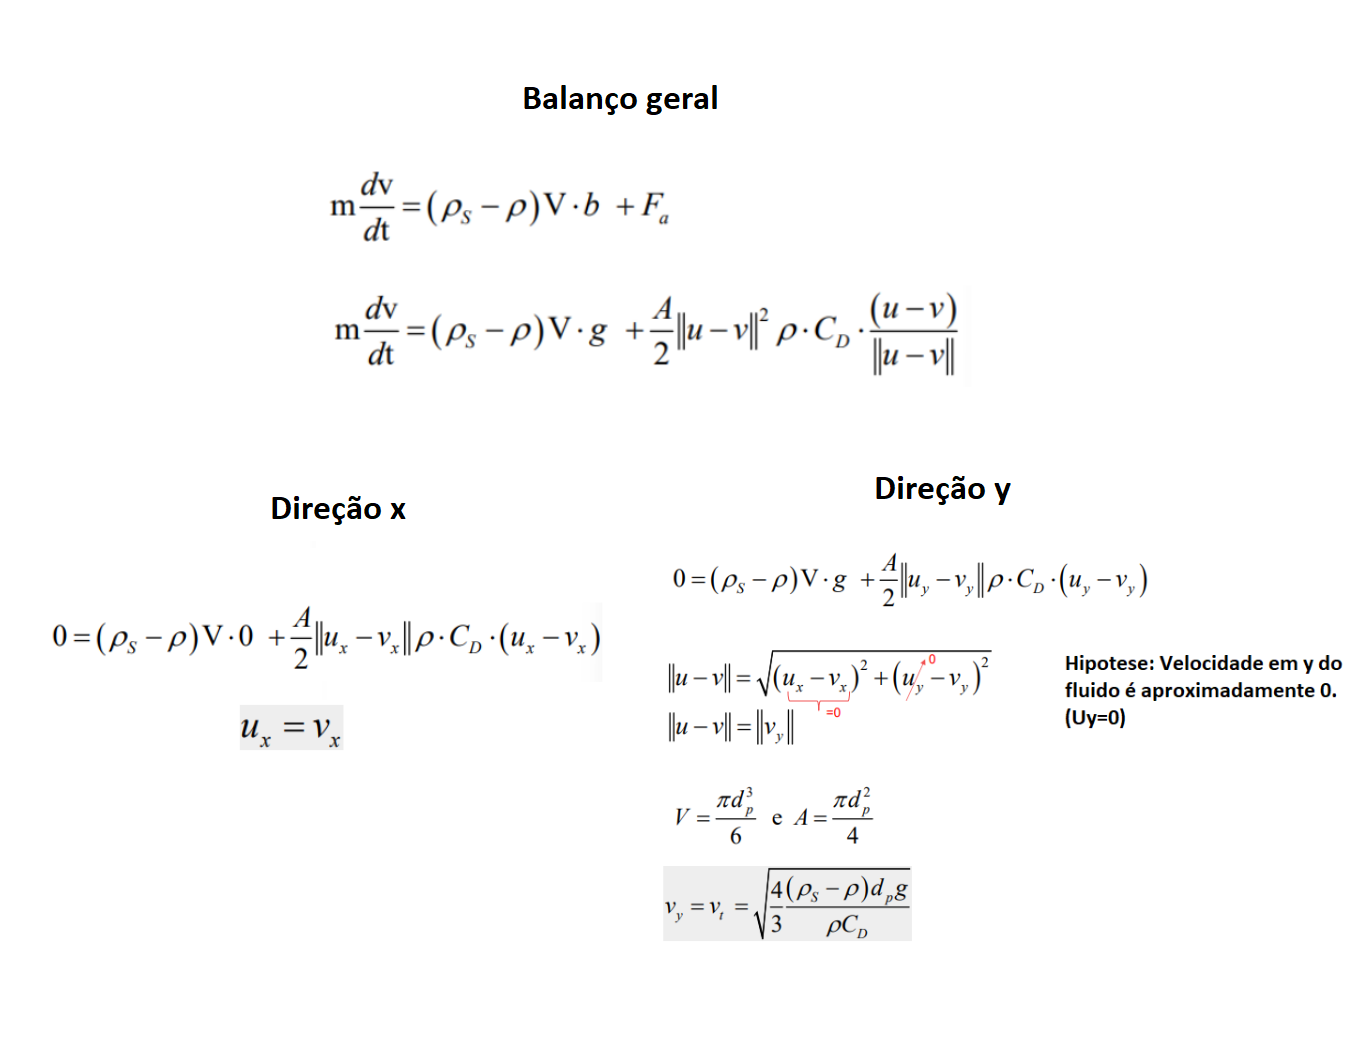

Desse modo, chegamos a duas importantes conclusões:

- A **velocidade do fluido em x** (Ux) é igual a **velocidade da particula em x** (Vx)
- A **velocidade da particula em y** (Vy) é igual sua velocidade terminal.

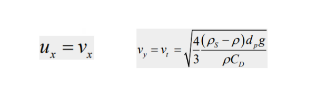

<h1> # [ 3 ] Câmara de Separação Gravitacional: Dimensionamento

Considerando a figura da câmara gravitacional abaixo:

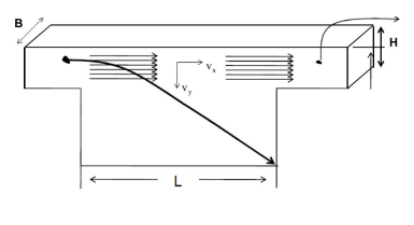

Desse modo temos:

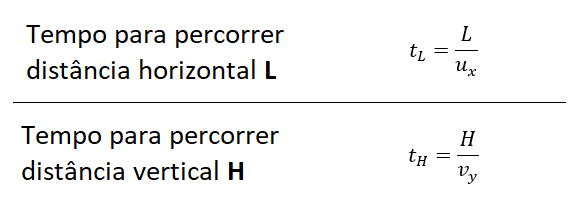

Igualando os tempos, chegamos em:

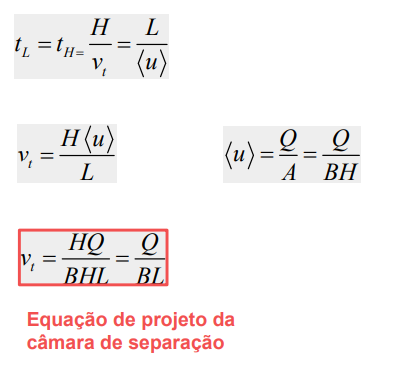

<h1> # [ 4 ] Câmara de Separação Gravitacional: Dimensionamento

Caso tenha duvidas, siga as instruções abaixo:

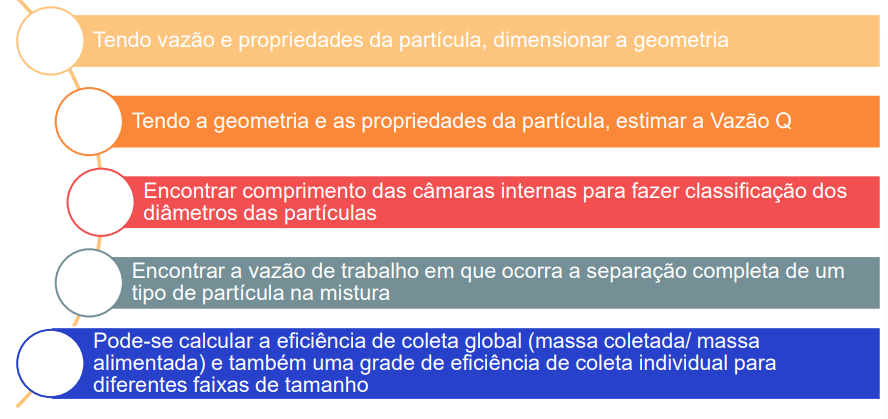

---

<h1 align="center"> Algoritmos

<h1> # Câmara de Separação Gravitacional: Algoritmo

In [58]:
import math

class Particula:
    def __init__(self, ps, esfericidade, dp=None, vt=None, Re=None, nome="Não especificado"):
        self.nome = nome
        self.ps = ps
        self.esfericidade = esfericidade
        self.K1 = 0.843*math.log10(esfericidade/0.065)
        self.K2 = 5.31 - 4.88*esfericidade
        self.dp = dp
        self.vt = vt
        self.Re = Re
        self.CdRe2 = None
        self.Cd_Re = None
        
    def __repr__(self):
        return f"""        ### Relatorio da particula {self.nome} ###
        
        ps = {self.ps}
        esfericidade = {self.esfericidade}
        K1 = {self.K1}
        K2 = {self.K2}
        dp = {self.dp}
        vt = {self.vt}
        Re = {self.Re}
        CdRe2 = {self.CdRe2}
        Cd_Re = {self.Cd_Re}
        
        ### ------------------- ###\n"""

    

class Fluido:
    def __init__(self, pf, u, cm=True):
        
        self.pf = pf
        self.u = u
        self.g = 981 if cm else 9.81     # cm³/s or m/s
        self.particulas = {}
        
    
    def add_particula(self, particula, nome):
        self.particulas[nome] = particula
        
        
    def Re_with_dp(self, dp, nome):
        part = self.particulas[nome]
        part.dp = dp
        n = 4*self.pf*(part.ps-self.pf)*self.g*part.dp**3
        d = 3*self.u**2
        CdRe2 =n/d; part.CdRe2 = CdRe2
        if part.esfericidade == 1:
            Re = ( (CdRe2/24)**(-0.95) + (CdRe2/0.43)**(-0.95/2) )**(-1/0.95)
        else:
            Re = ( (part.K1*CdRe2/24)**(-1.2) + (CdRe2/part.K2)**(-0.5*1.2) )**(-1/1.2)
        part.Re = Re
        part.vt = Re*self.u/(part.dp*self.pf)

        
    def Re_with_vt(self, vt, nome):
        part = self.particulas[nome]
        part.vt = vt
        n = 4*(part.ps-self.pf)*self.u*self.g
        d = 3*self.pf**(2)*part.vt**3
        Cd_Re =n/d; part.Cd_Re = Cd_Re
        if part.esfericidade == 1:
            Re = ( (24*Cd_Re)**(0.88/2) + (0.43*Cd_Re)**(0.88) )**(1/0.88)
        else:
            Re = ( (24/(Cd_Re*part.K1))**(0.65) + (part.K2/Cd_Re)**(1.3) )**(1/1.3)
        part.Re = Re
        part.dp = Re*self.u/(part.vt*self.pf)

    
    
    def __repr__(self):
        return f"""        ### Relatorio do fluido ###
        
        pf = {self.pf}
        u = {self.u}
        Particulas em suspensão:
        {list(self.particulas.keys())}
        
        ### ------------------- ###\n"""

    
    
    
    
    
    
    
areia = Particula(2.6, 0.8, nome="areia"); cal = Particula(2.2, 0.7, nome="cal")
fluido = Fluido(1, 0.01)
fluido.add_particula(areia, "areia"); fluido.add_particula(cal, "cal")
fluido.Re_with_dp(70*10**-4, "areia")
fluido.Re_with_vt(0.36833454429890966, "cal")
print(cal)
print(areia)
print(fluido)

        ### Relatorio da particula cal ###
        
        ps = 2.2
        esfericidade = 0.7
        K1 = 0.8701316880820912
        K2 = 1.8939999999999997
        dp = 0.008084373872688289
        vt = 0.36833454429890966
        Re = 0.2977754166338652
        CdRe2 = None
        Cd_Re = 314.0954437995096
        
        ### ------------------- ###

        ### Relatorio da particula areia ###
        
        ps = 2.6
        esfericidade = 0.8
        K1 = 0.9190188993842812
        K2 = 1.4059999999999997
        dp = 0.007
        vt = 0.36833454429890966
        Re = 0.2578341810092368
        CdRe2 = 7.178304000000001
        Cd_Re = None
        
        ### ------------------- ###

        ### Relatorio do fluido ###
        
        pf = 1
        u = 0.01
        Particulas em suspensão:
        ['areia', 'cal']
        
        ### ------------------- ###

